<div style="text-align: right"> Practical lesson 2 <br/> Sébastien Harispe <br/> IMT Mines Alès </div>

<h1><center>Practical Machine Learning: <br/> Supervised Machine Learning <br/> Linear Regression & Gradient Descent</center></h1>

<br/>
<div class='text-danger'><center> Correction</center></div>

# Aim of the practical lesson

In this practical lesson we will:
* Define a playground to introduce practical aspects of Supervised Machine Learning.
* Focus on Linear Regression
* Develop our first supervised Machine Learning algorithm.

We will mainly use `numpy` and `matplotlib` Python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234) # This is to make our work reproducible

<div class="alert alert-success">
  We will first create a function $f : \mathbb{R} \rightarrow \mathbb{R}$ that will represent the underlying function we would like to approximate, i.e. $f : \mathcal{X} \rightarrow \mathcal{Y}$, <br/>
    e.g. $f(x) = -2 + 1.8x - 0.1x^2 - 0.18x^3 + 0.03x^4$. <br/>
<br/>
 Define a Python function corresponding to $f$.
 <br/>
    
<b>Important</b>: Keep in mind that this function will never be known when you'll deal with a Machine learning problem. 
</div>


 

In [2]:
def f(x):
  return -2 + 1.8 * x - 0.1 * x**2 - 0.18 * x**3 + 0.03 * x**4 

In [3]:
f(4)

-0.2400000000000002

<div class="alert alert-success">
  Set a range of values [min_x, max_x] of  $\mathcal{X}$ on which you will restrict your analysis. <br/>
   This will be required for plotting our results. 
</div>

In [4]:
min_x = -4
max_x = 7

min_y = -10 
max_y = 20

<div class="alert alert-success">
  Plot the function using matplolib. 
</div>

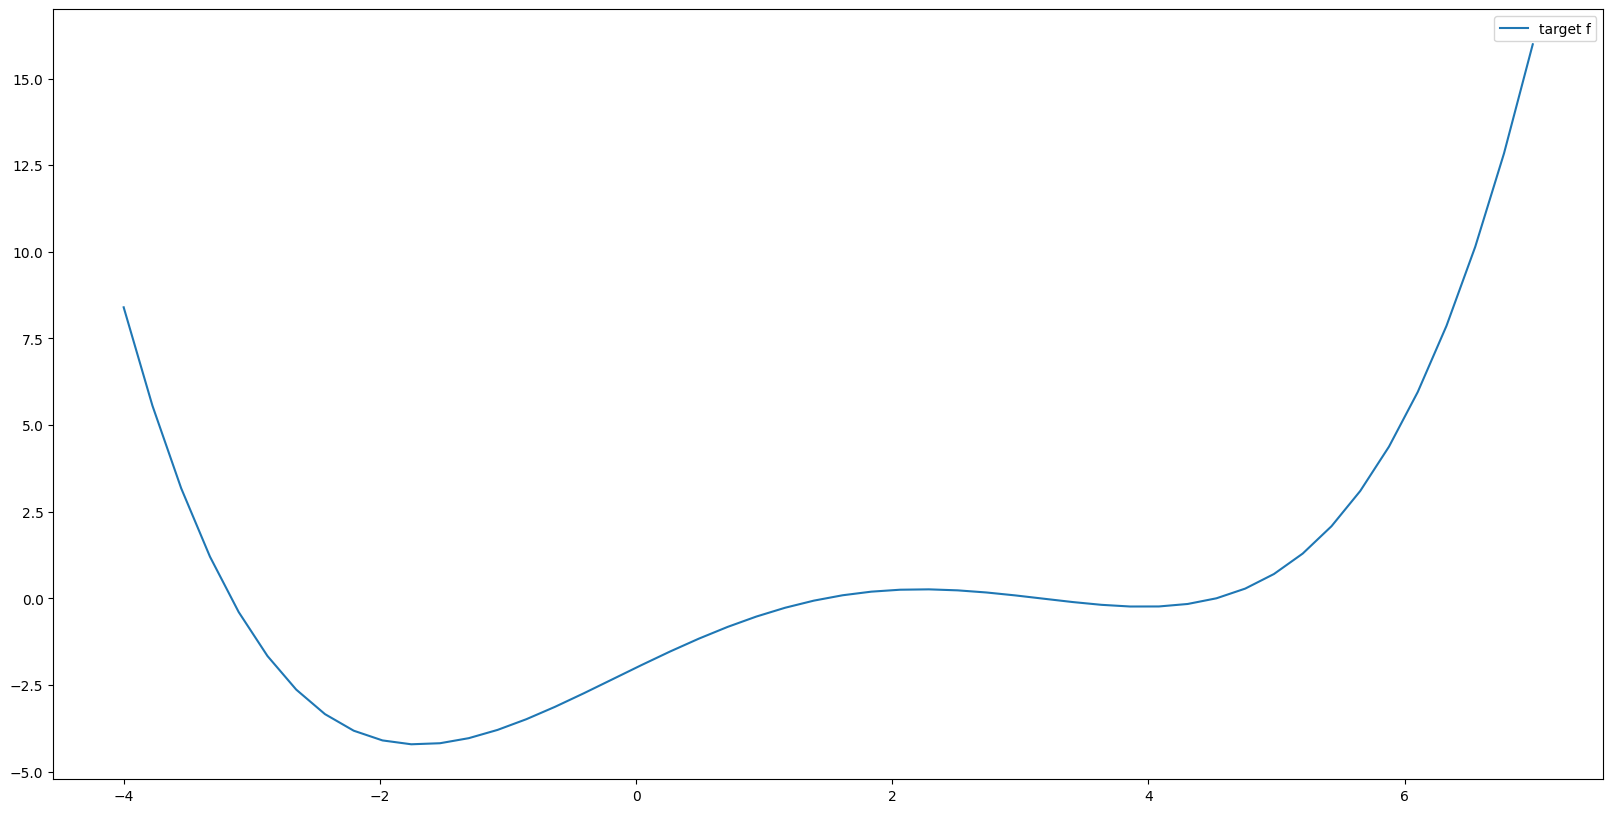

In [5]:
x_plot = np.linspace(min_x,max_x)[..., np.newaxis] # we add an extra dimension
y_plot = f(x_plot)

plt.figure(figsize=(20, 10))
plt.plot(x_plot, y_plot, label="target f")
plt.legend()

plt.show()

<div class="alert alert-success">
  Generate samples in the predifined range of values [min_x, max_x] and compute the expected target value (label) for each sample. <br/>
  We will assume that we are not able to observe exact values of $f$. To do so we will consider that for any $x \in \mathcal{X}$ we only have access to a label $f(x) + \epsilon$.
    Assume that $\epsilon$ is sampled from a standard normal distribution, i.e. univariate normal (Gaussian) distribution of mean 0 and variance 1. <br/>
    You will also assume that sampling $\mathcal{X}$ is made considering a uniform distribution. 
    <br/> <br/>
    Consider that you have nb_samples labelled observations in your dataset, i.e. pairs $(x,y)$.
</div>


In [6]:
nb_samples = 500

x = np.random.uniform(low=min_x, high=max_x, size=(nb_samples,1))
y = f(x) + np.random.randn(nb_samples,1)

print(f"x : {x.shape}")
print(f"y : {y.shape}")

x : (500, 1)
y : (500, 1)


<div class="alert alert-success">
  Plot the target function, the labelled observations (dataset) and the distribution of $x$ values among your dataset. 
</div>

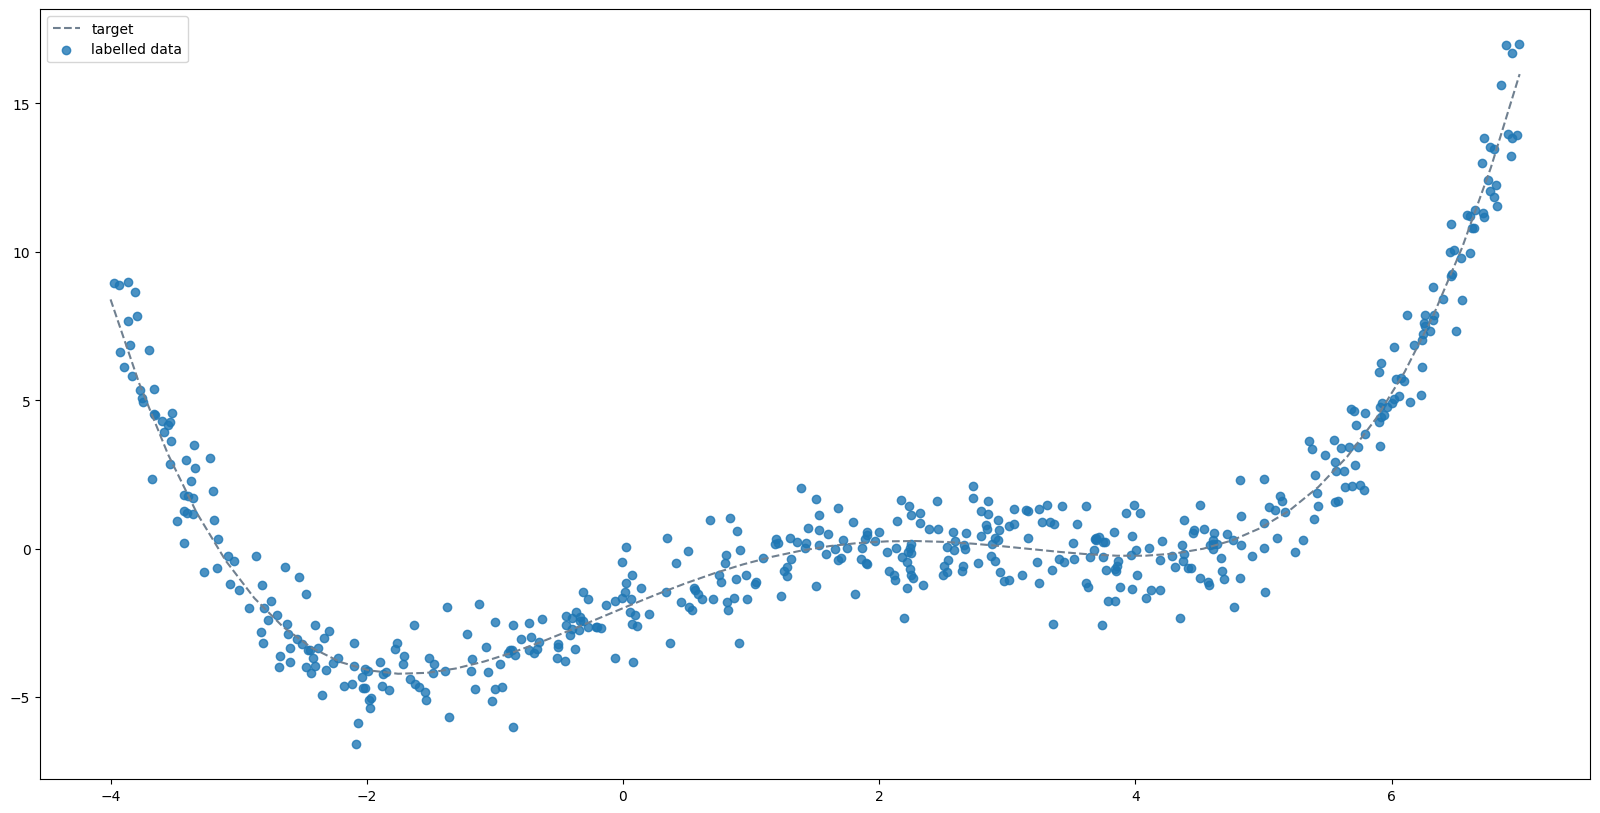

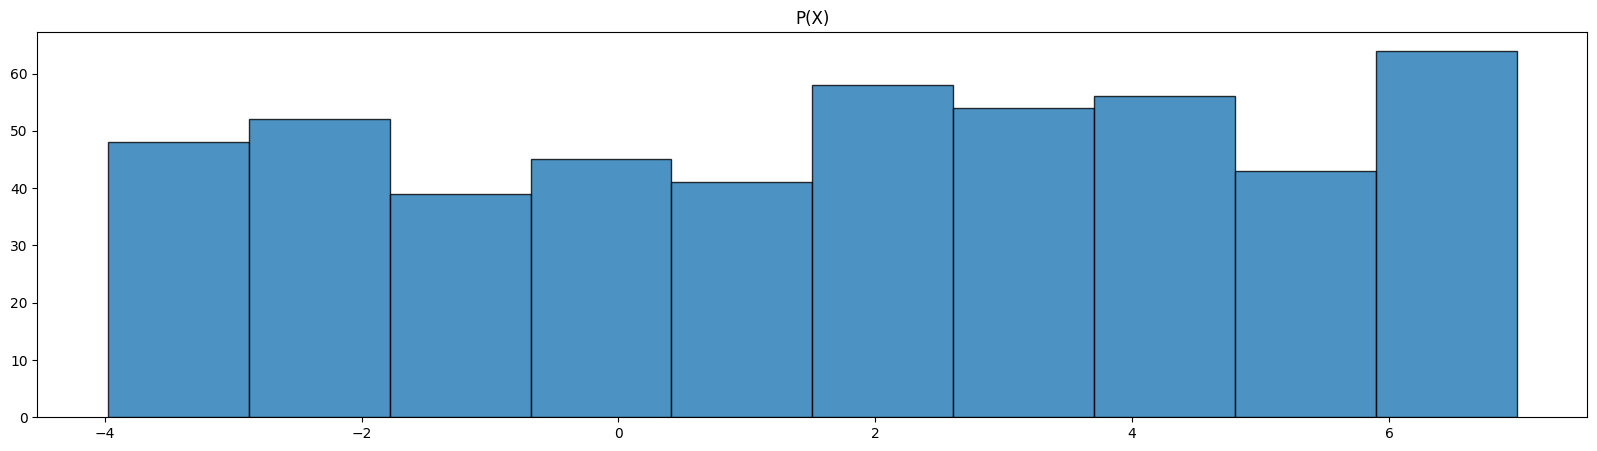

In [7]:
plt.figure(figsize=(20, 10))
x_plot = np.linspace(min_x,max_x)
y_plot = f(x_plot)
plt.plot(x_plot, y_plot, "--", c="slategrey", label="target")
plt.scatter(x, y, marker="o", c="tab:blue", label="labelled data", alpha=0.8)
plt.legend()

plt.figure(figsize=(20, 5))
plt.hist(x, histtype='bar', ec='black', alpha=0.8)
plt.title("P(X)")
plt.show()

<div class="alert alert-success">
  We will further consider that the relationship between the domain $\mathcal{X}$ and $\mathcal{Y}$ can be modelled by a linear model ($\mathcal{H}$ will be restricted to linear models). <br/>
    This may be true or false depending on the function $f$ you've defined. <br/>
    Keep in mind that we are not supposed to know $f$, we just postulate that this is true. 
    <br/>
    Our aim will be to find an hypothesis $h \in \mathcal{H}$ corresponding to our linear model such as $h \approx f$.
    <br/><br/>
    We could for instance consider that the set of hypotheses to consider is $\mathcal{H} = \{h | h(x) = \theta_0 + \theta_1 x\}$ <br/>
    Finding an hypothesis would therefore correspond to finding the parameters $\theta = [\theta_0, \theta_1]^\top$, with $\theta \in \mathbb{R}^2$.
    <br>
    More generally we could consider that our set of hypotheses $\mathcal{H}$ contains all polynomials of degree $0, 1, \ldots, k$ such as $\mathcal{H}_{pol(k)} = \{h | h(x) = \sum_{i=0}^{k} \theta_i x^i\}$. In this case, finding an hypothesis would therefore correspond to finding the parameters $\theta = [\theta_0, \ldots, \theta_k]^\top$, with $\theta \in \mathbb{R}^{k+1}$.
    <br/>
    Note that defining $\textbf{x} = [1, x, x^2, \ldots, x^k]$, we could easily compute $h$ as $h(x) = \textbf{x}\theta$.
    <br/><br/>
    Define a function pol_features that will be used to compute $\textbf{x} \in \mathbb{R}^{k+1}$ for a given $k$ and $x$.
</div>

In [8]:
def pol_features(x, degree):
    return np.column_stack([x**i for i in range(degree+1)])


In [9]:
print(x.shape)
X = pol_features(x, degree=2)
print(X.shape)
X

(500, 1)
(500, 3)


array([[ 1.        , -1.89328605,  3.58453205],
       [ 1.        ,  2.84319648,  8.08376623],
       [ 1.        ,  0.81500513,  0.66423336],
       ...,
       [ 1.        ,  5.08759565, 25.88362946],
       [ 1.        , -2.40012488,  5.76059943],
       [ 1.        ,  3.11703971,  9.71593655]])

<div class="alert alert-success">
Define your error function considering MSE (Mean Squared Error)

\begin{equation*}
MSE(\mathcal{D}, h_\theta) = \frac{1}{|\mathcal{D}|} \sum_{i=1}^{\mathcal{|\mathcal{D}|}} (h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation*}
With $(x^{(i)}, y^{(i)})$ the element $i$ of our dataset.
</div>

In [10]:
def mse(y_pred, y):
    """Mean Squared Error"""
    return ((y_pred - y)**2).mean()

In [11]:
y_pred = np.random.rand(nb_samples)
error = mse(y_pred, y)
error

18.138652458528668

<div class="alert alert-success">
We will now implement our predictor $h_\theta$. <br/>
This predictor is parametric and fully defined by the associated vector of parameters $\theta$. <br/>
<br/>
Create a class LinearRegressor that will be used to instantiate representations of a function $h \in \mathcal{H}$.
Set the vector of parameters $\theta$ as an attribute and initialize it randomly.
    <br/>
In the class, define a function predict that will enable to compute the prediction for a given x. <br/>
Next, refine your function to enable the computation of the prediction for several input values in one call. Assume that the polynomial features have been computed beforehand, i.e. considering $h \in \mathcal{H}_{pol(k)}$ and $m$ input values, the input given to the predict function will now be $X \in \mathbb{R}^{m \times (k+1)}$.

</div>

In [12]:
class LinearRegressor: 
    def __init__(self, nb_parameters):
        ''' nb_parameters is the size of theta'''
        raise NotImplementedError
        
    def predict(self, X): 
        raise NotImplementedError
    
    def __call__(self, X):
        ''' this will enable to write
            h = LinearRegressor(...)
            y_pred = h(X) instead of h.predict(X)
        '''
        return self.predict(X)
    
    def __str__(self):
        return "+".join(["\\theta_0"] + [ f"\\theta_{i} x^{i} " for i in range(1, self.nb_parameters)])


In [13]:
class LinearRegressor: 
    def __init__(self, nb_parameters):
        self.nb_parameters = nb_parameters
        self.theta = np.zeros((nb_parameters,1))
        
    def predict(self, X): 
        return X @ self.theta
    
    def __call__(self, X):
        return self.predict(X)
    
    def __str__(self):
        return "+".join(["\\theta_0"] + [ f"\\theta_{i} x^{i} " for i in range(1, self.nb_parameters)])

In [14]:
pol_degree = 4
nb_parameters = pol_degree + 1

h = LinearRegressor(nb_parameters)
X = pol_features(x, pol_degree)

y_pred = h(X)

error = mse(y, y_pred)

print(f"h(x): {str(h)}")
print(f"Theta: {h.theta}")
print(f"MSE : {error:.2f}")
print(f"RMSE: {np.sqrt(error):.2f}")

h(x): \theta_0+\theta_1 x^1 +\theta_2 x^2 +\theta_3 x^3 +\theta_4 x^4 
Theta: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
MSE : 18.55
RMSE: 4.31


<div class="alert alert-success">
  Plot the target function, the labelled observations (dataset), and your approximation $h$. 
</div>

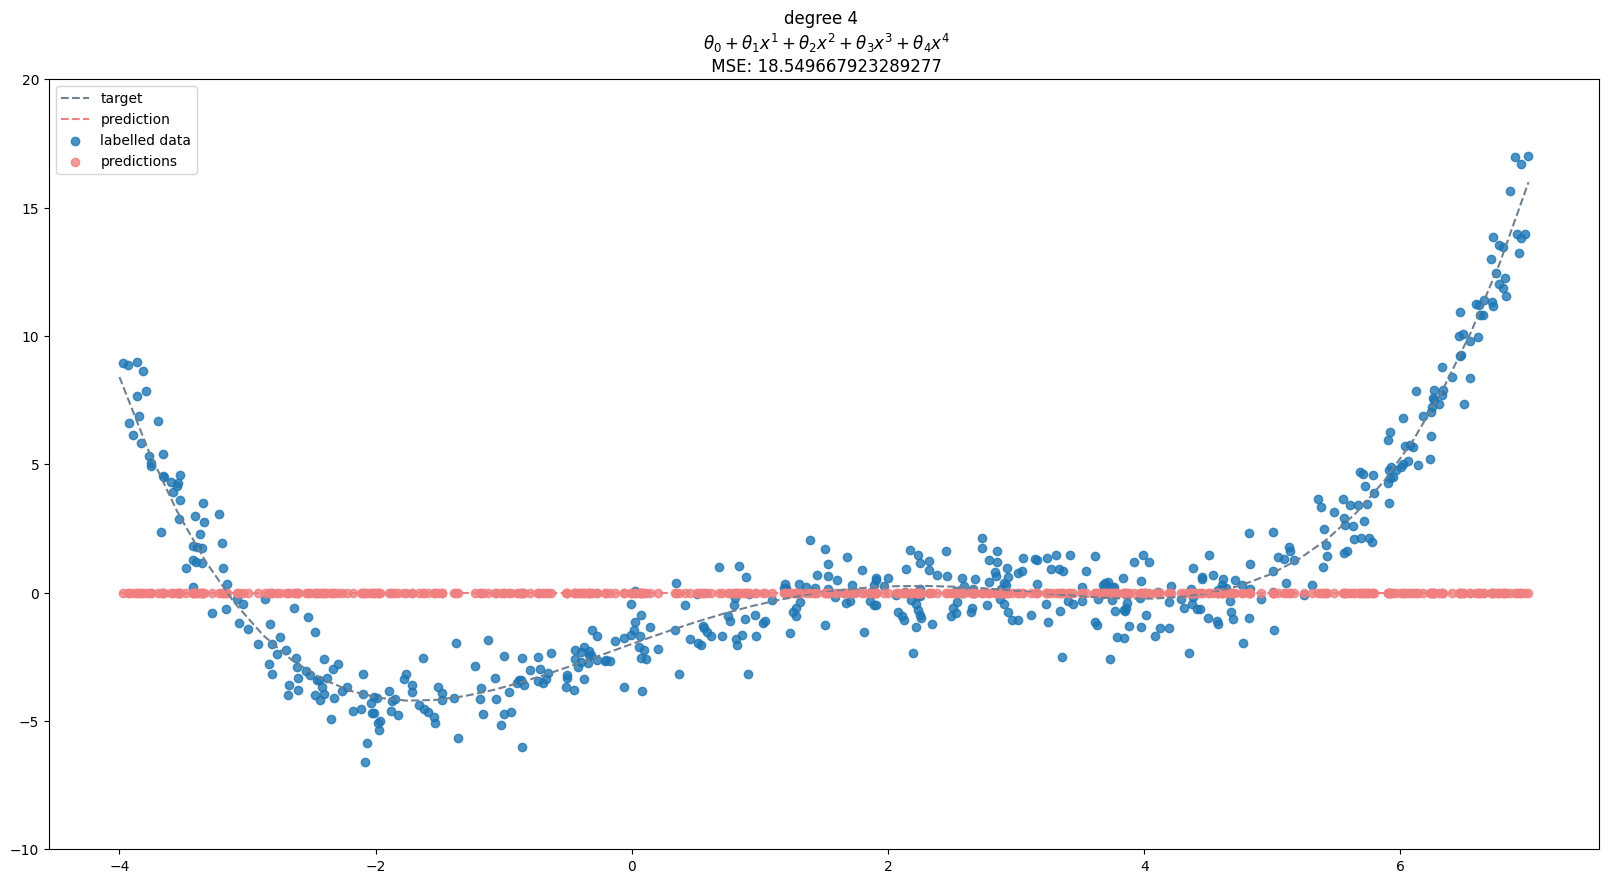

In [15]:
def plot(x, y, h, pol_features, save_path=None):

    X = pol_features(x, h.nb_parameters-1)
    y_pred = h(X)
    
    x_plot = np.linspace(min_x,max_x)[..., np.newaxis]
    y_plot = f(x_plot)
    
    X_plot = pol_features(x_plot, h.nb_parameters-1)
    
    y_plot_pred = h(X_plot)
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(x_plot, y_plot, "--", c="slategrey", label="target")
    ax.plot(x_plot, y_plot_pred, "--", c="lightcoral", label="prediction")
    
    ax.scatter(x, y, marker="o", c="tab:blue", label="labelled data", alpha=0.8)
    ax.scatter(x, y_pred, marker="o", c="lightcoral", label="predictions", alpha=0.8)
    
    ax.set_title(f"degree {pol_degree} \n ${str(h)}$\n MSE: {mse(y_pred, y)}")
    ax.set_ylim([min_y, max_y])
    ax.legend()
    
    if save_path:
        fig.savefig(save_path)
        plt.close(fig)
    else: 
        plt.show()

    
plot(x, y, h, pol_features)

<div class="alert alert-success">
 We will now define the gradient descent procedure. <br/>
 The procedure will be iterative:
\begin{equation*}
    \theta^{(t+1)}_j := \theta^{(t)}_j - \alpha \frac{\partial MSE(\mathcal{D}, h_\theta)}{\partial \theta_j}
\end{equation*}
    
First compute the gradient $\nabla_\theta MSE(\mathcal{D}, h_\theta) = [\frac{\partial MSE(\mathcal{D}, h_\theta)}{\partial \theta_0}, \ldots]^\top$
</div>


Gradient of MSE wrt to parameters of a linear regression model

Consider $h_\theta : \mathbb{R}^{k+1} \rightarrow \mathbb{R}$, with $h_\theta(x) = \sum_{j = 0}^{k} \theta_j x_j$.

\begin{equation*}
MSE(\mathcal{D}, h_\theta) = \frac{1}{|\mathcal{D}|} \sum_{i=1}^{\mathcal{|\mathcal{D}|}} (h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation*}

Computing the gradient $\nabla_\theta MSE(\mathcal{D}, h_\theta)$ requires computing : 
\begin{equation*}
\frac{\partial MSE(\mathcal{D}, h_\theta) }{ \partial\theta_{j}}
\end{equation*}

Considering the chain rule: 

\begin{equation*}
\frac{\partial MSE(\mathcal{D}, h_\theta) }{ \partial\theta_{j}} =
\frac{\partial MSE(\mathcal{D}, h_\theta) }{ \partial((h_\theta(x^{(\cdot)}) - y^{(\cdot)})^2) }
\frac{ \partial((h_\theta(x^{(\cdot)}) - y^{(\cdot)})^2) }{\partial h_\theta(x^{(\cdot)}) }
\frac{\partial h_\theta(x^{(\cdot)})}{\theta_j}
\end{equation*}

Note that $MSE(\mathcal{D}, h_\theta)$ is:
\begin{equation*}
MSE(\mathcal{D}, h_\theta) = \frac{1}{|\mathcal{D}|} \sum u(h_\theta(x^{(i)}), y^{(i)})^2  
\end{equation*}
with $u(a,b) = a - b$

\begin{align*}
 \frac{\partial MSE(\mathcal{D}, h_\theta)}{ \partial u} &= \frac{1}{|\mathcal{D}|} \sum 2 u \\
 &= \frac{2}{|\mathcal{D}|} \sum u \\
\end{align*}

We will now compute $\frac{\partial u}{ \partial h_\theta(x^{(i)})}$
\begin{equation*}
\frac{\partial u}{ \partial h_\theta(x^{(i)})} = \frac{\partial (h_\theta(x^{(i)}) - y^{(i)})}{ \partial h_\theta(x^{(i)})} = 1 - 0  = 1 \\
\end{equation*}

Let's now compute $\frac{\partial (h_\theta(x^{(i)})}{ \partial \theta_{j}}$
\begin{equation*}
\frac{\partial (h_\theta(x^{(i)})}{ \partial \theta_{j}} = x^{(i)}_j \\
\end{equation*}

\begin{align*}
 \frac{\partial MSE(\mathcal{D}, h_\theta)}{ \partial\theta_{j}} &= \frac{\partial MSE(\mathcal{D}, h_\theta)}{ \partial u} \frac{\partial u}{ \partial h_\theta(x^{(i)})} 
 \frac{\partial (h_\theta(x^{(i)})}{ \partial \theta_{j}} \text{   (chain rule)} \\
 &=  \frac{2}{|\mathcal{D}|} \sum_{i=1}^{\mathcal{|\mathcal{D}|}} (h_\theta(x^{(i)}) - y^{(i)}) \cdot 1 \cdot x^{(i)}_j \\
  &=  \frac{2}{|\mathcal{D}|} \sum_{i=1}^{\mathcal{|\mathcal{D}|}} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}_j \\
\end{align*}

The gradient can therefore be expressed by: 
\begin{equation*}
\nabla_\theta MSE(\mathcal{D}, h_\theta) =  \frac{2}{|\mathcal{D}|} \cdot (\hat{y}-y)^\intercal \cdot X
\end{equation*}

<div class="alert alert-success">
 Let's implement our gradient descent algorithms <br/>
 Define a class OptimizerGD_LinearRegressor implementing the following functions.
</div>

In [16]:
class OptimizerGD_LinearRegressor():
    
    def __init__(self, regressor):
        ''' regressor is the predictor (h) for which we wante to optimize theta '''
        raise NotImplementedError
        
    def compute_gradient(self, X, y, y_pred):
        ''' compute the gradient of the error wrt. to the parameters'''
        raise NotImplementedError
    
    def fit(self, nb_iterations, learning_rate, X, y, quiet=False):
        '''implements gradient descent'''
        raise NotImplementedError

In [17]:
class OptimizerGD_LinearRegressor():
    
    def __init__(self, regressor):
        self.h = regressor
        
    def compute_gradient(self, X, y, y_pred):
        nb_samples = X.shape[0]
        grad = 2/nb_samples * (y_pred-y).T @ X
        return grad.T
    
    def fit(self, nb_iterations, learning_rate, X, y, quiet=False):

        for i in range(nb_iterations):

            y_pred = self.h(X)
            error = mse(y_pred, y)
            grad = self.compute_gradient(X, y, y_pred)


            if not quiet and i % (nb_iterations/10) == 0:
                print(f"{i} Error {error} ")
                
            self.h.theta = self.h.theta - learning_rate * grad
            
        if not quiet:
            print(f"{i} Error {mse(self.h(X), y)}")


In [18]:
def test_fit(nb_samples, pol_degree, nb_iterations, learning_rate):
    np.random.seed(1234)
    x = np.random.uniform(low=min_x, high=max_x, size=(nb_samples,1))
    y = f(x) + np.random.randn(nb_samples,1)
    
   

    X = pol_features(x, pol_degree)

    h = LinearRegressor(pol_degree + 1)
    opt = OptimizerGD_LinearRegressor(h)
    opt.fit(nb_iterations, learning_rate, X, y)
        
    plot(x, y, h, pol_features)

0 Error 17.317893363650178 
100000 Error 3.620487634091179 
200000 Error 3.062518346263831 
300000 Error 2.6326054781634762 
400000 Error 2.2992855019551617 
500000 Error 2.0390896586335976 
600000 Error 1.8344809843698413 
700000 Error 1.67232741032034 
800000 Error 1.5427710941416182 
900000 Error 1.4383907983418007 
999999 Error 1.3535810423480406


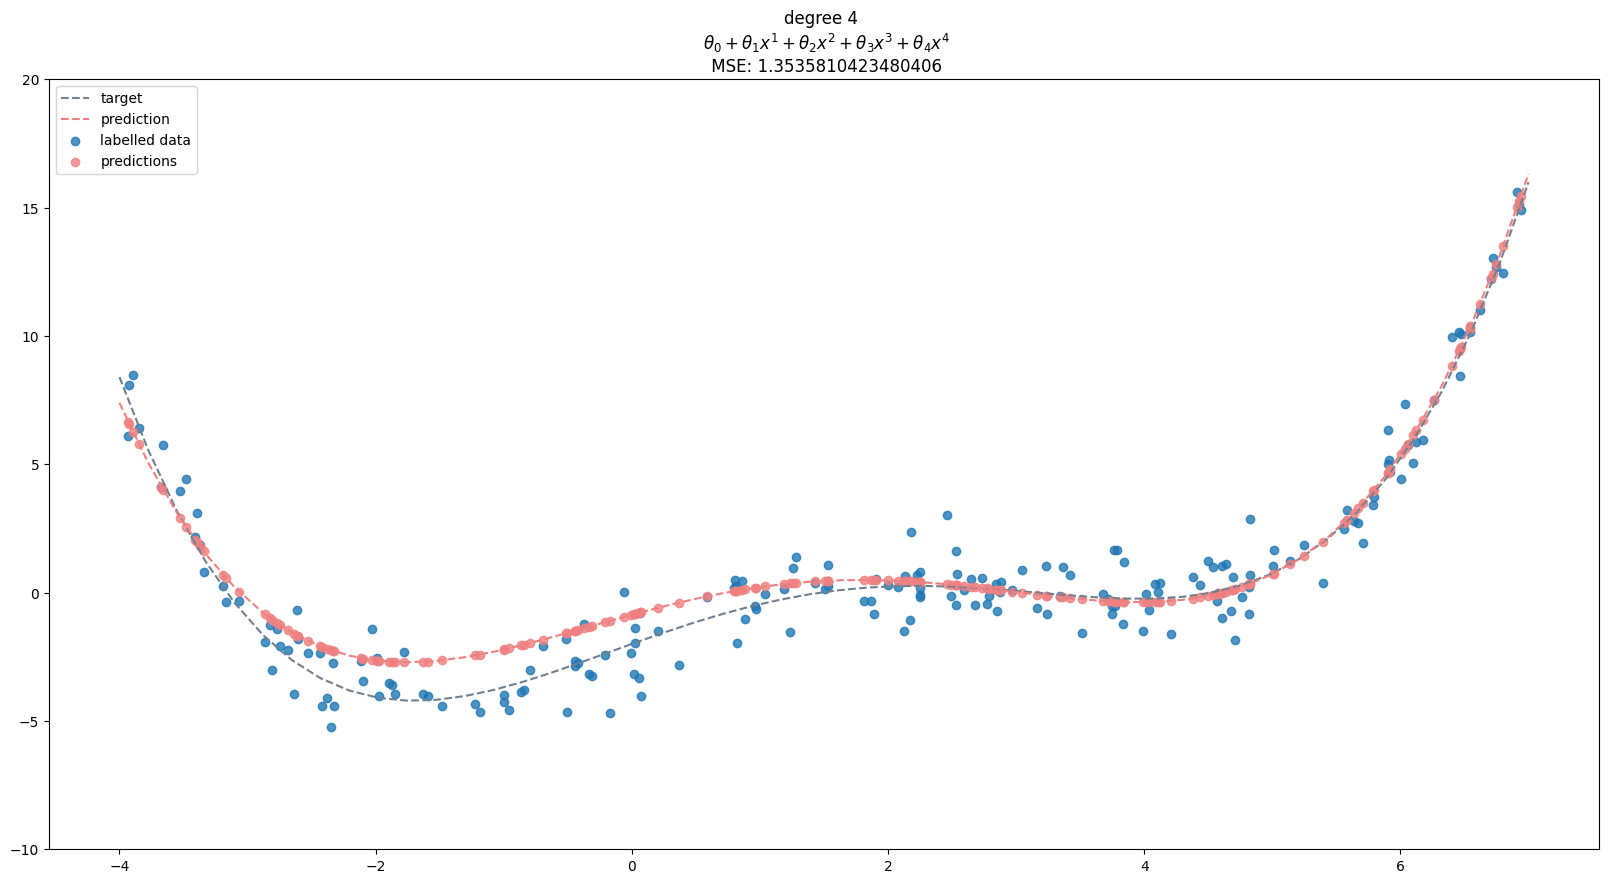

In [19]:
test_fit(
    nb_samples = 200,
    pol_degree = 4,
    nb_iterations = 1000000,
    learning_rate = 10e-7)

<div class="alert alert-success">
 Use your implementation to optimize your predictor wrt your dataset. <br/>
 Make sure you're reducing the error at each step.
 Note that the learning rate will sometime have to be very (very) little.
</div>

In [20]:
def sandbox_derivative(): 
    # Sandbox derivative to detail how the gradient is computed
    m  = 10 # nb samples
    n = 2  # nb features

    X = np.reshape(np.arange(m * n) + 1, (m, n))
    theta = np.random.rand(n,1)
    y_pred = X @ theta
    y = y_pred + 1/2

    e = y_pred - y 
    
    def show(label, d):
        print(f"{label}:{d.shape} \n\n {d}\n")
    
    show("X", X)
    show("Theta",theta)
    show("e", e)   
    show("e.T @ X", e.T @ X)
    show("2/m * e.T @ X", 2/m * e.T @ X)
    
    
sandbox_derivative()

X:(10, 2) 

 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]

Theta:(2, 1) 

 [[0.32277227]
 [0.33863078]]

e:(10, 1) 

 [[-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]]

e.T @ X:(1, 2) 

 [[-50. -55.]]

2/m * e.T @ X:(1, 2) 

 [[-10. -11.]]



0 Error 15.020155035780792 
1000 Error 4.322013658824892 
2000 Error 4.184688120683626 
3000 Error 4.1288519670418715 
4000 Error 4.0835477793801935 
5000 Error 4.0436320440125435 
6000 Error 4.008169845663568 
7000 Error 3.9765692469049823 
8000 Error 3.9483291122673467 
9000 Error 3.923014317963233 
9999 Error 3.9002463577340944


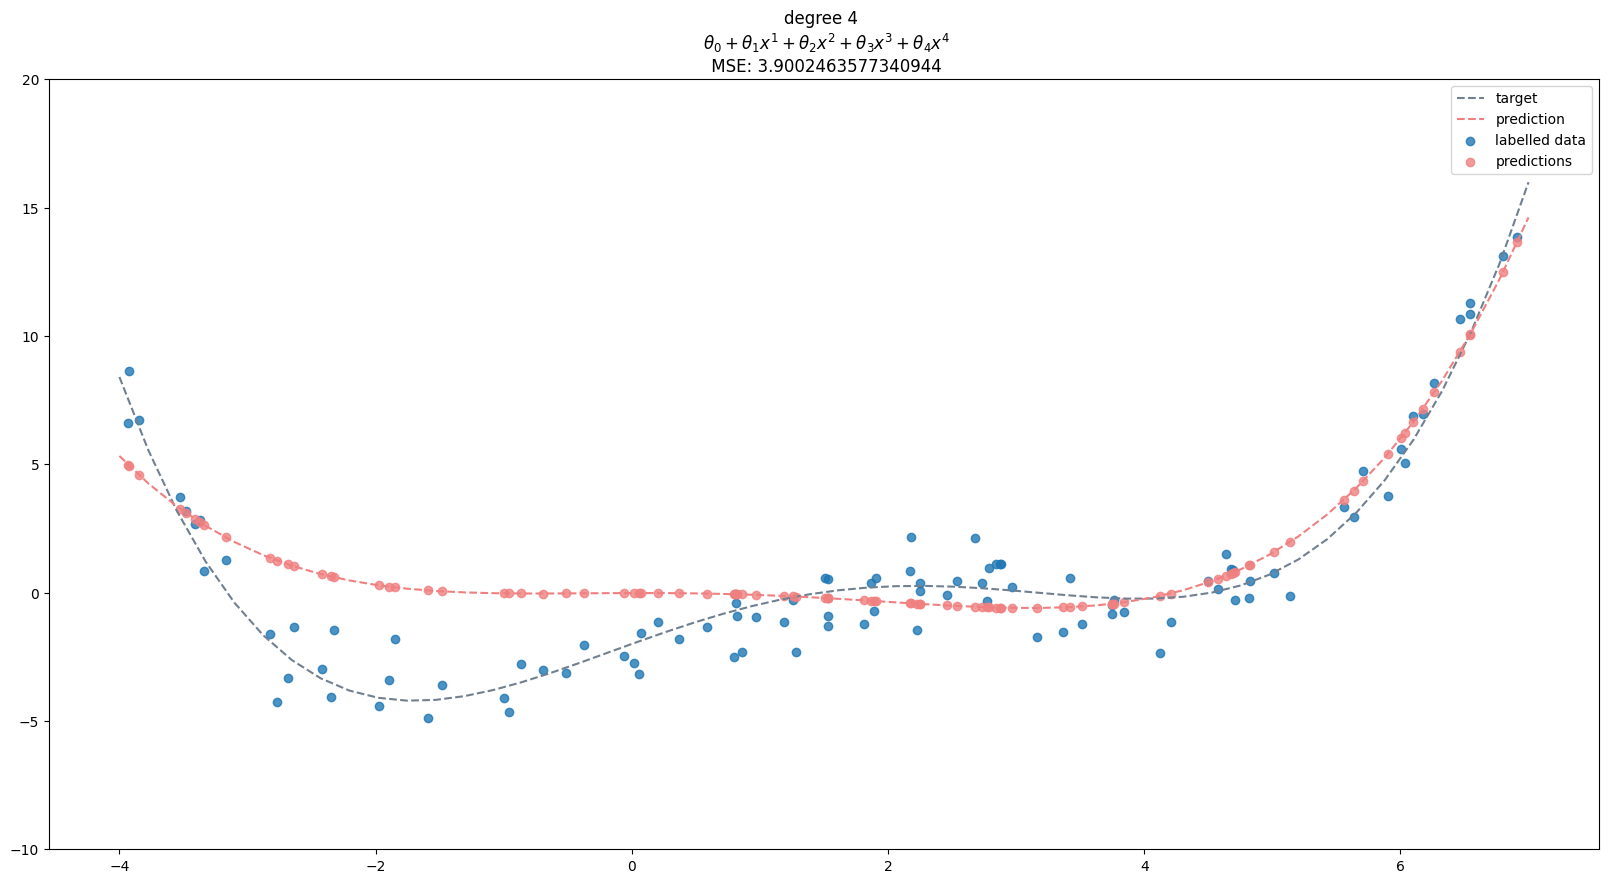

In [21]:
test_fit(
    nb_samples = 100,
    pol_degree = 4,
    nb_iterations = 10000,
    learning_rate = 10e-7)

0 Error 15.020155035780792 
100000 Error 3.3164622501277803 
200000 Error 2.898295771183827 
300000 Error 2.564955990676749 
400000 Error 2.296834135872174 
500000 Error 2.0792066801268763 
600000 Error 1.900972690737386 
700000 Error 1.7537231638266388 
800000 Error 1.631054212018872 
900000 Error 1.5280596593740186 
999999 Error 1.4409556923454254


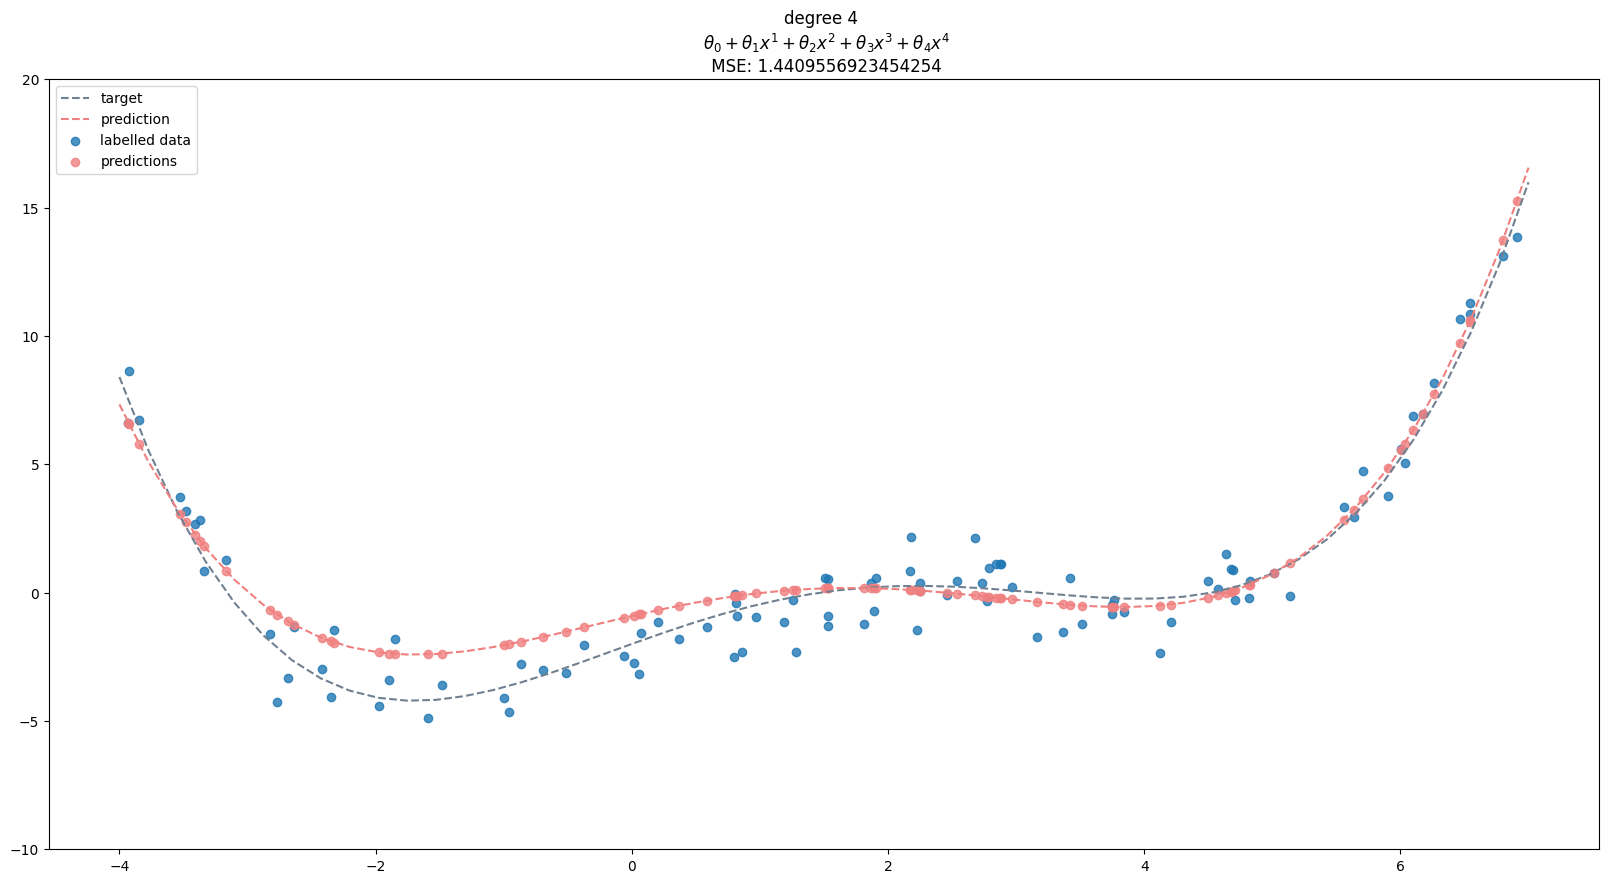

In [22]:
test_fit(
    nb_samples = 100,
    pol_degree = 4,
    nb_iterations = 1000000,
    learning_rate = 10e-7)

0 Error 6.586528215922719 
300000 Error 5.662231747481162 
600000 Error 5.6350049771438595 
900000 Error 5.609796310392921 
1200000 Error 5.585111861642974 
1500000 Error 5.560702797498978 
1800000 Error 5.536525632106949 
2100000 Error 5.512570776461401 
2400000 Error 5.488834265217035 
2700000 Error 5.465313093876977 
2999999 Error 5.442004449404781


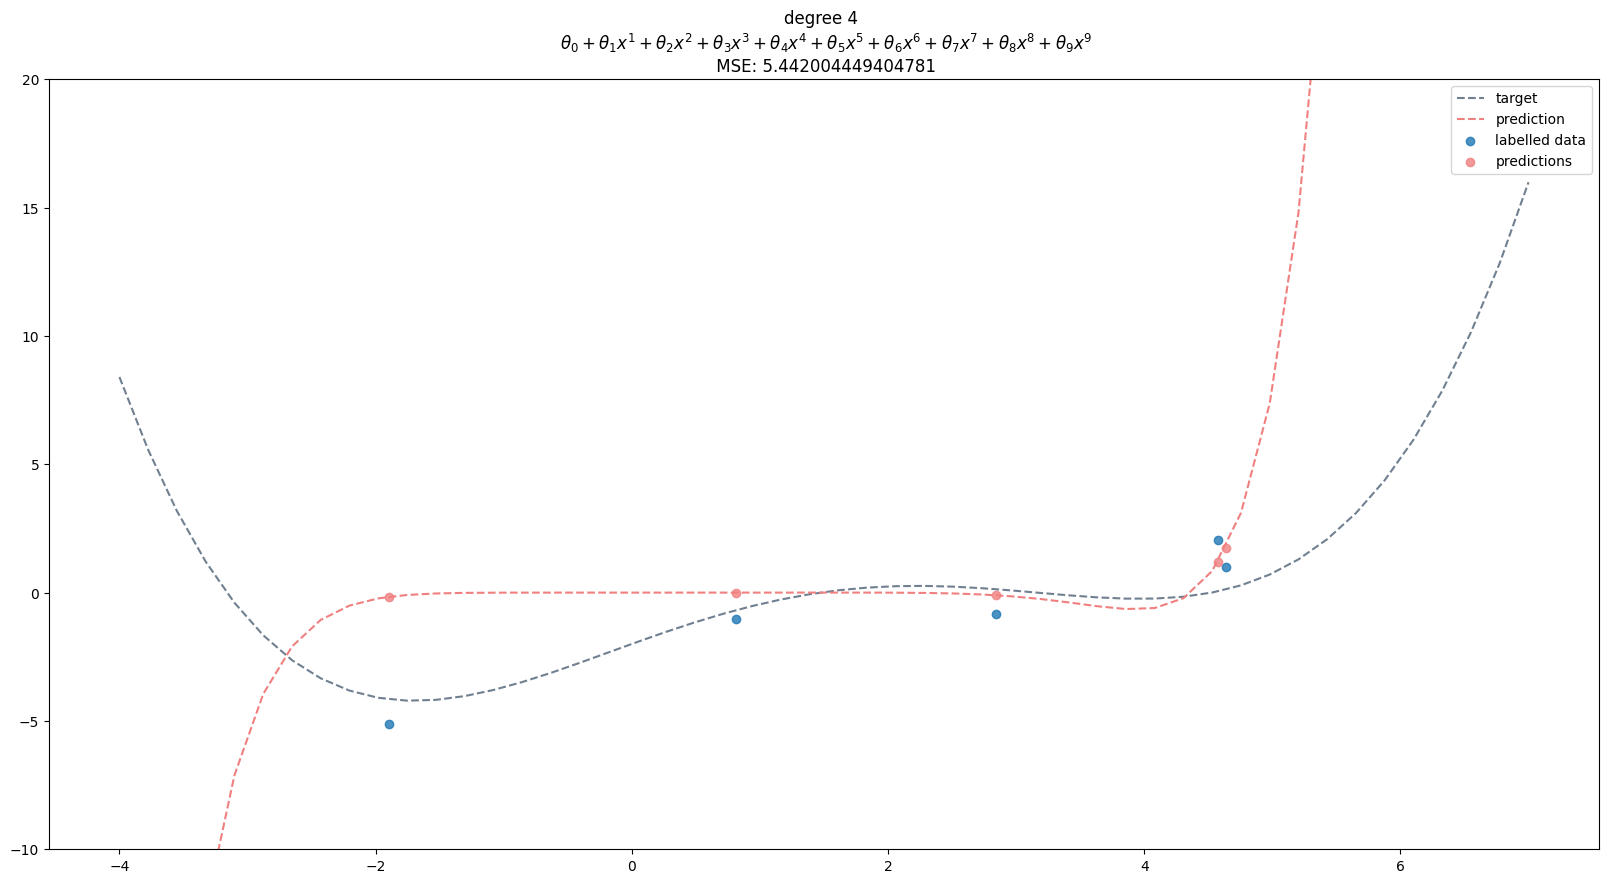

In [23]:
test_fit(
    nb_samples = 5,
    pol_degree = 9,
    nb_iterations = 3000000,
    learning_rate = 10e-13)

In [24]:
# conda install c conda-forge ffmpeg

In [25]:
import shutil
from pathlib import Path
import matplotlib.image as mpimg
from matplotlib import animation, rc
from tqdm.notebook import tqdm

from IPython.display import HTML

img_path = "/tmp/image_plots"
shutil.rmtree(img_path, ignore_errors=True)
Path(img_path).mkdir(parents=True, exist_ok=True)

nb_samples = 100
pol_degree = 4
nb_steps = 100
nb_iterations_step = 10000
learning_rate = 10e-7

h = LinearRegressor(pol_degree + 1)
X = pol_features(x, pol_degree)

opt = OptimizerGD_LinearRegressor(h)

plot(x, y, h, pol_features, save_path=f"{img_path}/step_0.jpg") 

pbar = tqdm(range(nb_steps), bar_format='{desc}')
for i in pbar:
    opt.fit(nb_iterations_step, learning_rate, X, y, quiet=True)    
    pbar.set_description(f"step {i+1}/{nb_steps} MSE: {mse(h(X), y):.4f}")
    plot(x, y, h, pol_features, save_path=f"{img_path}/step_{i+1}.jpg") 

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
def show_video(interval=200):

    fig, ax = plt.subplots(figsize=(15,10))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ims = []

    print("Loading images")
    for i in tqdm(range(nb_steps)):
        image = mpimg.imread(f"{img_path}/step_{i}.jpg")
        im = ax.imshow(image, animated=True)
        ims.append([im])

    anim = animation.ArtistAnimation(fig, ims, interval=interval, blit=False,
                                  repeat_delay=1000)
    rc('animation', html='html5')
    # To save the animation, use
    # anim.save("movie.mp4")
    plt.close(fig)
    print("Loading video (may take some time...)")
    return anim

anim = show_video()
HTML(anim.to_html5_video())